In [64]:
import pandas as pd

df = pd.read_json("../Data/Raw/News_Category_Dataset_v3.json", lines=True)

In [65]:
df.size

1257162

In [66]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [67]:
df.drop(['link', 'authors', 'date'],axis=1, inplace=True)

In [68]:
df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [69]:
df.isnull().sum()

headline             0
category             0
short_description    0
dtype: int64

In [70]:
print(df.size)

628581


In [71]:
df.shape

(209527, 3)

In [72]:
category_counts = df['category'].value_counts()
category_counts.unique()

array([35602, 17945, 17362,  9900,  9814,  8791,  6694,  6347,  6340,
        5992,  5400,  5077,  4583,  4320,  3955,  3664,  3653,  3572,
        3562,  3484,  3426,  3299,  2944,  2777,  2622,  2579,  2577,
        2254,  2206,  2104,  2096,  1756,  1509,  1444,  1401,  1398,
        1377,  1339,  1144,  1130,  1074,  1014])

In [73]:
category_counts.head(10)

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
Name: count, dtype: int64

In [74]:
category_counts.tail(10)

category
ARTS              1509
ENVIRONMENT       1444
FIFTY             1401
GOOD NEWS         1398
U.S. NEWS         1377
ARTS & CULTURE    1339
COLLEGE           1144
LATINO VOICES     1130
CULTURE & ARTS    1074
EDUCATION         1014
Name: count, dtype: int64

In [75]:
df['headline_len'] = df['headline'].astype(str).apply(lambda x: len(x.split()))
df['short_description_len'] = df['short_description'].astype(str).apply(lambda x: len(x.split()))

In [76]:
df.head()

,headline,category,short_description,headline_len,short_description_len
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,11,29
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,13,28
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",13,12
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",9,25
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,11,25


In [77]:
df[['headline_len','short_description_len']].describe()

,headline_len,short_description_len
count,209527.000000,209527.000000
mean,9.600744,19.669026
std,3.068507,14.152783
min,0.000000,0.000000
25%,8.000000,10.000000
50%,10.000000,19.000000
75%,12.000000,24.000000
max,44.000000,243.000000


In [78]:
(df['short_description'].isna() | df['short_description'].str.strip() == '').sum()

np.int64(0)

In [79]:
import numpy as np
df.loc[df['short_description'].str.strip() == '', 'short_description'] = np.nan

In [80]:
(df['headline'].str.strip() == '').sum()

np.int64(6)

In [81]:
(df['headline'].isna()).sum()

np.int64(0)

In [82]:
import numpy as np
df.loc[df['headline'].isna(), 'headline'] = np.nan

In [83]:
df[df['headline'].isna()]

,headline,category,short_description,headline_len,short_description_len


<Axes: >

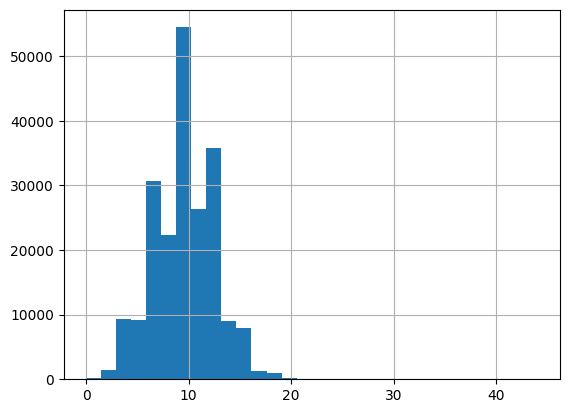

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
df['headline_len'].hist(bins=30)

<Axes: >

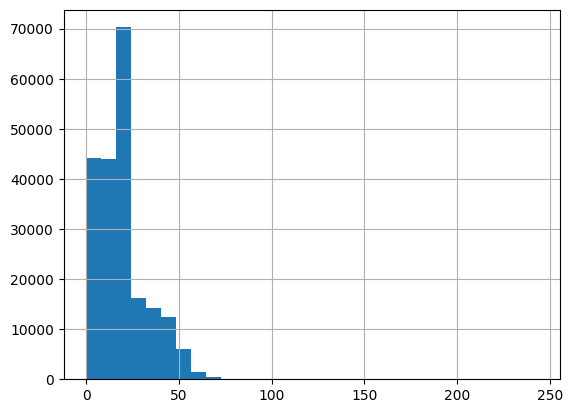

In [85]:
df['short_description_len'].hist(bins=30)

In [86]:
(df['short_description_len']>0).mean()

np.float64(0.9059214325600042)

In [87]:
(df['headline_len']>0).mean()

np.float64(0.9999713640724107)

In [88]:
df.head()

,headline,category,short_description,headline_len,short_description_len
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,11,29
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,13,28
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",13,12
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",9,25
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,11,25


In [89]:
df.to_csv("../Data/Processed/news_category_processed.csv", index=False)